<a href="https://colab.research.google.com/github/dphi-official/Data_Science_Bootcamp/blob/master/Advanced_Material/Leaderboard_Plots/Leaderboard_Plot_DPhi_Learners_Dataset_Modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Leader Board Plots
---

**Author:** Pascal Wiltschko (Coach)


Link to Dataset: https://bit.ly/DPhi_LearnerGroups

# Application of Visualization on Learners Dataset (real-dataset)


Hey there. If you are curious how I made the two leaderboard plots that were shown in todays session, this short notebook is for you!

---
## Import Modules
---

First, we import the needed modules.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
## Import Data
---

Next, we import the data using pandas. For Excel data, it is important to select which sheet you want to work with.

Looking at the data types, it is visible that all columns were imported as "object", what we might want to change later.

In [ ]:
# Only for Google Colab users
from google.colab import files
uploaded = files.upload()

Saving DPhi - Learners - Beginners & Absolute Beginners - Real Dataset - DPhi_Learners.csv to DPhi - Learners - Beginners & Absolute Beginners - Real Dataset - DPhi_Learners (1).csv


In [ ]:
# week 0 (and 1 quiz from week 1)
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/DPhi%20-%20Learners%20-%20Beginners%20%26%20Absolute%20Beginners%20-%20Real%20Dataset%20-%20DPhi_Learners.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Learner_ID        1447 non-null   object
 1   Quiz1             1447 non-null   object
 2   Quiz2             1447 non-null   object
 3   Quiz3             1447 non-null   object
 4   Quiz4             1447 non-null   object
 5   Quiz5             1447 non-null   object
 6   Quiz6             1447 non-null   object
 7   Quiz7             1447 non-null   object
 8   Total_Score       1447 non-null   object
 9   Group_ID          1447 non-null   object
 10  Learner_Category  1447 non-null   object
dtypes: object(11)
memory usage: 124.5+ KB


In [ ]:
df.head()

,Learner_ID,Quiz1,Quiz2,Quiz3,Quiz4,Quiz5,Quiz6,Quiz7,Total_Score,Group_ID,Learner_Category
0,AB1,10,10,8,9,10,10,10,67,AB_G1,Absolute Beginner
1,AB2,10,10,10,9,10,9.09,NaN,58.09,AB_G1,Absolute Beginner
2,AB3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AB_G1,Absolute Beginner
3,AB4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AB_G1,Absolute Beginner
4,AB5,10,10,9,9,10,8.18,10,66.18,AB_G1,Absolute Beginner


---
## Transform Data
---

Because the original column names are very long and contain spaces, we replace them with shorter ones. You can just create a list and assign it to the "columns" attribute of the data frame. 

An alternative would be to use a dictionary and the df.rename() method. This is especially handy if you only want to rename a subset of the columns, so keep that in mind!

Because we only want the leader board for one group, we subset the data.

In [ ]:
# filter for ab_g13
df = df[df.Group_ID == "AB_G1"]

Also, we realize that missing values were entered as "-" characters. This is also the reason why all dtypes were imported as "object". Replacing them with numpy's NaN solves this and we now have more appropriate dtypes.

In [ ]:
# replace "-" by NAN
df = df.replace("-", np.nan)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Learner_ID        32 non-null     object
 1   Quiz1             19 non-null     object
 2   Quiz2             17 non-null     object
 3   Quiz3             16 non-null     object
 4   Quiz4             16 non-null     object
 5   Quiz5             14 non-null     object
 6   Quiz6             11 non-null     object
 7   Quiz7             3 non-null      object
 8   Total_Score       19 non-null     object
 9   Group_ID          32 non-null     object
 10  Learner_Category  32 non-null     object
dtypes: object(11)
memory usage: 3.0+ KB


In [ ]:
df.head()

,Learner_ID,Quiz1,Quiz2,Quiz3,Quiz4,Quiz5,Quiz6,Quiz7,Total_Score,Group_ID,Learner_Category
0,AB1,10,10,8,9,10,10,10,67,AB_G1,Absolute Beginner
1,AB2,10,10,10,9,10,9.09,NaN,58.09,AB_G1,Absolute Beginner
2,AB3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AB_G1,Absolute Beginner
3,AB4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AB_G1,Absolute Beginner
4,AB5,10,10,9,9,10,8.18,10,66.18,AB_G1,Absolute Beginner


Let's look at the a table of the leader board before plotting it! We first filter for positive scores and the required columns and then sort by the total score. To make the index start from zero we reset it.

In [ ]:
#  df["Total_Score"] = pd.to_numeric(df["Total_Score"])
# df["Quiz1"] = pd.to_numeric(df["Quiz1"])
# df["Quiz1"] = pd.to_numeric(df["Quiz1"])
# df["Quiz1"] = pd.to_numeric(df["Quiz1"])
# df["Quiz1"] = pd.to_numeric(df["Quiz1"])
cols = df.columns.drop(['Learner_ID', 'Group_ID', 'Learner_Category'])
df[cols] = df[cols].apply(pd.to_numeric)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Learner_ID        32 non-null     object 
 1   Quiz1             19 non-null     float64
 2   Quiz2             17 non-null     float64
 3   Quiz3             16 non-null     float64
 4   Quiz4             16 non-null     float64
 5   Quiz5             14 non-null     float64
 6   Quiz6             11 non-null     float64
 7   Quiz7             3 non-null      float64
 8   Total_Score       19 non-null     float64
 9   Group_ID          32 non-null     object 
 10  Learner_Category  32 non-null     object 
dtypes: float64(8), object(3)
memory usage: 3.0+ KB


In [ ]:
# get leader list
leaderboard_list = (df.loc[df["Total_Score"] > 0, ["Learner_ID", "Total_Score"]]
                    .sort_values("Total_Score", ascending=False)
                    .reset_index(drop=True))
print(leaderboard_list)

   Learner_ID  Total_Score
0        AB29        67.14
1         AB1        67.00
2         AB5        66.18
3        AB20        59.50
4        AB27        58.64
5        AB22        58.64
6         AB2        58.09
7        AB23        54.14
8        AB28        49.64
9         AB7        49.00
10       AB31        48.14
11       AB14        47.00
12       AB25        46.00
13       AB10        35.50
14       AB19        32.00
15       AB12        32.00
16       AB15        17.00
17        AB9        10.00
18       AB32         3.00


Now, it is almost time to create the plots. Looking at the seaborn documentation on how to create a heatmap, we realize that a specific layout is required. It involves the names on the y-axis as index and names on the x-axis as columns. The values we want to use in the heatmap are the only ones we should keep in the data frame.

Below, we again filter for positive scores, sort by the total score, drop columns we do not need and eventually, we replace the index by the name column.

In [ ]:
# heatmap df
df_heatmap = (df[df["Total_Score"] > 0]
              .sort_values("Total_Score", ascending=False)
              .drop(["Total_Score", "Group_ID", "Learner_Category"], axis=1)
              .set_index("Learner_ID"))

In [ ]:
df_heatmap.head()

,Quiz1,Quiz2,Quiz3,Quiz4,Quiz5,Quiz6,Quiz7
Learner_ID,,,,,,,
AB29,10.0,9.5,9.0,10.0,10.0,8.64,10.0
AB1,10.0,10.0,8.0,9.0,10.0,10.00,10.0
AB5,10.0,10.0,9.0,9.0,10.0,8.18,10.0
AB20,10.0,9.5,10.0,10.0,10.0,10.00,NaN
AB27,10.0,10.0,10.0,10.0,10.0,8.64,NaN


---
## Visualization 
---

Now, we initialize both figure and axis objects we use to make the plot. We want a subplot with one row and two columns and a certain size so that everything is clearly visible.

If this way of specifying a matplotlib plot is unfamiliar to you, please check out: https://matplotlib.org/3.2.1/tutorials/introductory/lifecycle.html.

For the heatmap, we select the colormap to be "BuGn" and specify that NaN values should get the color "lightgray". Then we set up the plot using sns.heatmap() using the df we created earlier and select that the numbers should also be included in the rectangles by setting annot=True.

Also remember that if we use the object oriented API of matplotlib, we have to use the "ax" object to make changes to the plot. In the seaborn call, we also have to select on which of the two axes of the subplot we want to draw the graph. In our case, the left one is ax[0] and the right one is ax[1]. We then rotate the ticks to make them more readable and set a title.

Finally, we also create the barchart that displays the total counts. We add annotations containing the total scores next to the bars by iterating over the ax object. If this looks complicated to you, remember that you can just copy it for your own plots for now and come back to it once you have explored the library more. To avoid labels that are cut-off, we increase the limits on the x-axis.

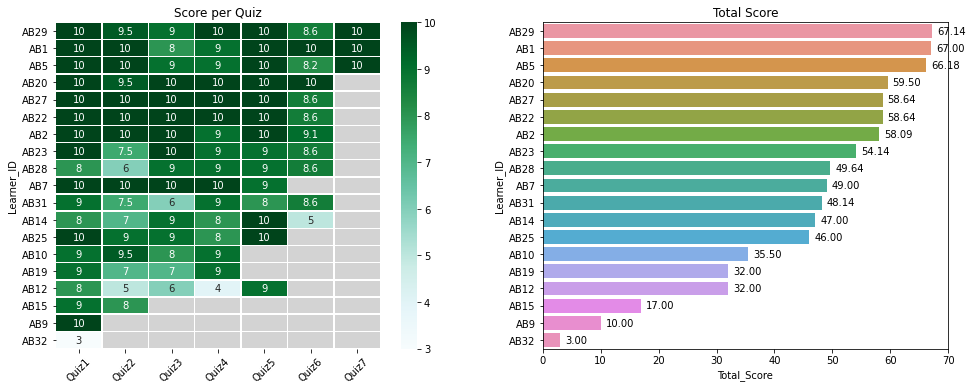

In [ ]:
# initialize plot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# heatmap
plt.cm.get_cmap(name="BuGn").set_bad("lightgray")
heatmap = sns.heatmap(df_heatmap, cmap="BuGn", annot=True, linewidths=.5, ax=ax[0])
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
ax[0].set_title("Score per Quiz")
# bar chart
sns.barplot(x="Total_Score", y="Learner_ID", data=leaderboard_list, ax=ax[1])
ax[1].set_xlim(0, 70)
ax[1].set_title("Total Score")
for p in ax[1].patches:
    ax[1].annotate("{0:.2f}".format(p.get_width()),
                   xy=(p.get_width(), p.get_y() + p.get_height() / 2),
                   xytext=(5, 0),
                   textcoords='offset points',
                   ha="left",
                   va="center")
plt.show()

Please send me a message on Slack if there are any questions and happy coding! :-)

Cheers,
Pascal Wiltschko.